# Airbnb Dataset Exploratory Data Analysis

This notebook demonstrates the processes involved, such as data wrangling, exploratory data analysis



## Data Wrangling
In the first section of the notebook
- We will attempt at cleaning the Airbnb Users,Age&Gender and Countries  Data and wrangling into a form that is suitable for further analysis. The entire data wrangling process will be done using the Python Pandas library.

![](https://media.tenor.com/images/566ce1e7cba9fe90d18e9b1f395e20e8/tenor.gif)

In [107]:
#importing the necessary libraries
%matplotlib inline
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

 # Steps:
- Load The data from the available csv files into a Pandas DataFrame.
- Extract the basic information such as the no of samples,no of missing values, no of features etc.
- Handling Missing values using suitable methods(dropping,PCA,Impute).
- Convert certain features into a more suitable form for applying inferential statistics.
- Visualise data to extract meaningful insights.



### Age, Gender and Population Statistics

![](http://www.queercafe.net/div24.gif)

In [63]:
#reading the dataset
df_agb = pd.read_csv('age_gender_bkts.csv')
#displaying records
df_agb.head()

,age_bucket,country_destination,gender,population_in_thousands,year
0,100+,AU,male,1.0,2015.0
1,95-99,AU,male,9.0,2015.0
2,90-94,AU,male,47.0,2015.0
3,85-89,AU,male,118.0,2015.0
4,80-84,AU,male,199.0,2015.0


In [64]:
# To get information about columns
df_agb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420 entries, 0 to 419
Data columns (total 5 columns):
age_bucket                 420 non-null object
country_destination        420 non-null object
gender                     420 non-null object
population_in_thousands    420 non-null float64
year                       420 non-null float64
dtypes: float64(2), object(3)
memory usage: 16.5+ KB


This dataset has no null values amongst its features.


- Now let us deal with the age bucket. The ages are given in bins of size 5. We will convert this to a numerical value so that we can increase its versaility should the need arise (that is, it can be used both as a categorical and a continuous feature). As the bin size is reasonably small, we can define a new feature, mean_age which can represent ages without too much loss of information. The mean_age will be the average of the upper and lower range for that particular bin.

In [68]:
df_agb['age_bucket'].unique()

array(['100+', '95-99', '90-94', '85-89', '80-84', '75-79', '70-74',
       '65-69', '60-64', '55-59', '50-54', '45-49', '40-44', '35-39',
       '30-34', '25-29', '20-24', '15-19', '10-14', '5-9', '0-4'],
      dtype=object)

In [69]:
#Convert 100+ into a bin.
df_agb['age_bucket'] = df_agb['age_bucket'].apply(lambda x: '100-104' if x == '100+' else x)
#Define mean_age feature
df_agb['mean_age'] = df_agb['age_bucket'].apply(lambda x: (int(x.split('-')[0]) + int(x.split('-')[1]))/2)
df_agb = df_agb.drop('age_bucket', axis=1)
df_agb.head()

,country_destination,gender,population_in_thousands,year,mean_age
0,AU,male,1.0,2015.0,102.0
1,AU,male,9.0,2015.0,97.0
2,AU,male,47.0,2015.0,92.0
3,AU,male,118.0,2015.0,87.0
4,AU,male,199.0,2015.0,82.0


In [66]:
#To get the distinct values in a column
df_agb['gender'].unique()

array(['male', 'female'], dtype=object)

In [67]:
# To get the no of male and female ocurrence in the datset
df_agb['gender'].value_counts()

male      210
female    210
Name: gender, dtype: int64

The gender can also be turned into a categorical binary variable. Let us represent **male with 0 and female with 1.** Again, we do this just in case we require this variable to function as a numerical quantity. It must be stated that there is no immediate need for it and therefore, can be skipped.

In [70]:
df_agb['gender'] = df_agb['gender'].apply(lambda x: 0 if x == 'male' else 1)
df_agb['gender'].value_counts()

1    210
0    210
Name: gender, dtype: int64

In [71]:
df_agb['year'].value_counts()

2015.0    420
Name: year, dtype: int64

There is only value available for the year feature. Therefore, it makes no sense to keep this feature as it doesn't add any information about the data available to us. We shall drop this feature.

In [72]:
df_agb = df_agb.drop('year', axis=1)
df_agb.head()

,country_destination,gender,population_in_thousands,mean_age
0,AU,0,1.0,102.0
1,AU,0,9.0,97.0
2,AU,0,47.0,92.0
3,AU,0,118.0,87.0
4,AU,0,199.0,82.0


## Country Statistics

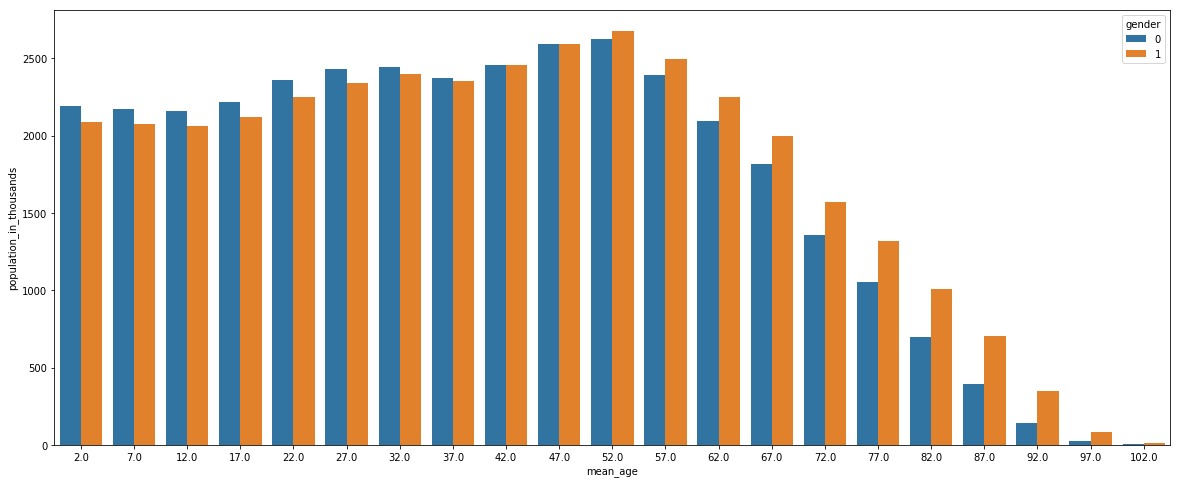

In [73]:
plt.figure(figsize=(20,8))
sns.barplot(x='mean_age', y='population_in_thousands', hue='gender', data=df_agb, ci=None)

## Observations
- The countries that are represented in this statistic largely consist of an aging population. The largest groups are people with mean ages 47 years and 52 years.
- The distribution resembles a skewed bell curve. The middle aged people occupy the largest share of the population, closely followed by the youth and finally, the old.
- The population counts of young and middle aged people are fairly comparable. But as we transition towards old age (age > 57 years), the population count for every successive bucket decreases steadily.
- One very interesting thing to note (although it may not be relevant to our analysis) is that the sex ratio is skewed towards men for younger age groups but as the mean age increases, the ratio skews more towards women. Women indeed live longer than men.

Next, let us try and graph the population count in each country.


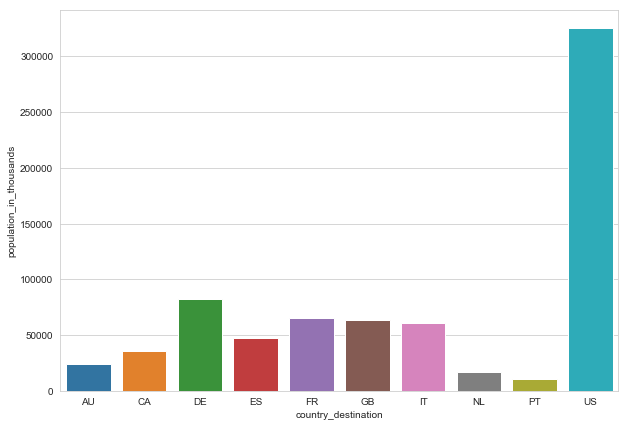

In [74]:
sns.set_style('whitegrid')
plt.figure(figsize=(10,7))
pop_stats = df_agb.groupby('country_destination')['population_in_thousands'].sum()
sns.barplot(x=pop_stats.index, y=pop_stats)

The **United States of America** is clearly the most populated nation amongst the destination countries with a population of over 300 million. All the other countries in the list have a population less than 100 million.

Next, let us create a bar plot of the distance of the country from the country of origin (United States of America). 
For this we need to load the data from countries.csv file which the distance parameters.
We will then construct a scatterplot between the frequency of booking in a country and the distance of the country. My initial hunch is that the further a country, the less likely people are to visit that particular country. There must be at least a small megative correlation between these two quantities


In [75]:
df_con=pd.read_csv('countries.csv')
df_con.head()

,country_destination,lat_destination,lng_destination,distance_km,destination_km2,destination_language,language_levenshtein_distance
0,AU,-26.853388,133.275160,15297.7440,7741220.0,eng,0.00
1,CA,62.393303,-96.818146,2828.1333,9984670.0,eng,0.00
2,DE,51.165707,10.452764,7879.5680,357022.0,deu,72.61
3,ES,39.896027,-2.487694,7730.7240,505370.0,spa,92.25
4,FR,46.232193,2.209667,7682.9450,643801.0,fra,92.06


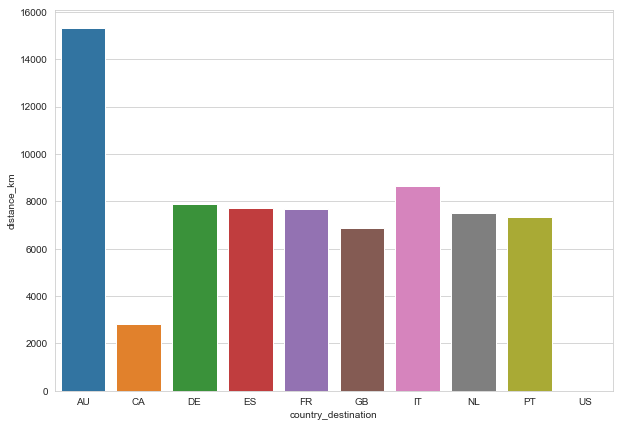

In [76]:
sns.set_style('whitegrid')
plt.figure(figsize=(10,7))
sns.barplot(x='country_destination', y='distance_km', data=df_con)

###  Users Data

![](https://media.tenor.com/images/4ee465335c6a528c72fc30b89a4ed8d6/tenor.gif)

Let us now explore the train_users dataset which consists of our AirBnb users 

In [82]:
# read airbnb users data into a dataframe
df_users = pd.read_csv('train_users_2.csv')
df_users.head()

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
0,gxn3p5htnn,2010-06-28,20090319043255,NaN,-unknown-,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF
1,820tgsjxq7,2011-05-25,20090523174809,NaN,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF
2,4ft3gnwmtx,2010-09-28,20090609231247,2010-08-02,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US
3,bjjt8pjhuk,2011-12-05,20091031060129,2012-09-08,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other
4,87mebub9p4,2010-09-14,20091208061105,2010-02-18,-unknown-,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US


In [85]:
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213451 entries, 0 to 213450
Data columns (total 16 columns):
id                         213451 non-null object
date_account_created       213451 non-null object
timestamp_first_active     213451 non-null int64
date_first_booking         88908 non-null object
gender                     117763 non-null object
age                        125461 non-null float64
signup_method              213451 non-null object
signup_flow                213451 non-null int64
language                   213451 non-null object
affiliate_channel          213451 non-null object
affiliate_provider         213451 non-null object
first_affiliate_tracked    207386 non-null object
signup_app                 213451 non-null object
first_device_type          213451 non-null object
first_browser              186185 non-null object
country_destination        213451 non-null object
dtypes: float64(1), int64(2), object(13)
memory usage: 26.1+ MB


The following features in the dataset have null values:

1. date_first_booking
2. gender
3. age
4. first_affiliate_tracked
5. first_browser

In [87]:
# found unknown values in datset which are actually "NAN" let replace them with "NAN"
df_users['gender'] = df_users['gender'].replace('-unknown-', np.nan)
df_users['first_browser'] = df_users['first_browser'].replace('-unknown-', np.nan)

In [89]:
df_users.describe()

,timestamp_first_active,age,signup_flow
count,2.134510e+05,125461.000000,213451.000000
mean,2.013085e+13,49.668335,3.267387
std,9.253717e+09,155.666612,7.637707
min,2.009032e+13,1.000000,0.000000
25%,2.012123e+13,28.000000,0.000000
50%,2.013091e+13,34.000000,0.000000
75%,2.014031e+13,43.000000,0.000000
max,2.014063e+13,2014.000000,25.000000


We notice that there are samples for which the age is much greater than 120 (the oldest person is currently 114 years old). This is clearly polluted data and must be removed. Let us replace these values with NaN to denote that we do not know the real age of these people.

In [92]:
df_users['age'] = df_users['age'].apply(lambda x: np.nan if x > 120 else x)

### Users Statistics

In this section, we will try to gain insights on our main dataset: the training dataset. These insights will be directly applicable in the later steps of Feature Engineering and Machine Learning. 

The very first step is to plot the frequency of each class.

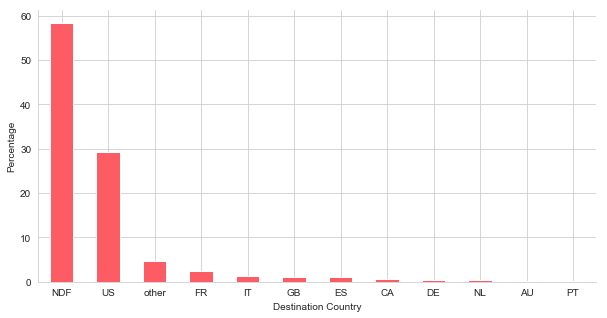

In [95]:
plt.figure(figsize=(10,5))
country_share = df_users['country_destination'].value_counts() / df_user.shape[0] * 100
country_share.plot(kind='bar',color='#FD5C64', rot=0)
plt.xlabel('Destination Country')
plt.ylabel('Percentage')
sns.despine()

As can be seen above, close to **60% of users have never booked an Airbnb.** Among the users that have, they have overwhelmingly chosen **United States as their first destination.** When training our machine learning model, it is of interest to us to separate the bookers from the non bookers. Subsequent classification amongst bookers would yield a high accuracy as we could use the imbalance of classes to our favor.

### Gender

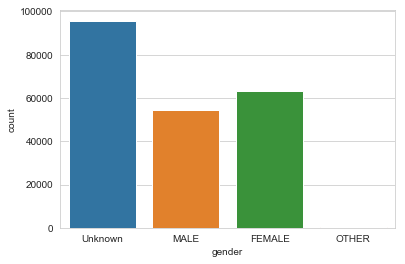

In [103]:
sns.countplot(df_users['gender'].fillna('Unknown'))

We see that the users whose gender is unknown form the majority. Out of the users whose gender is known, **there are more females than males.** This can suggest two things: 
1. There are more female Airbnb Users than male
2. Women are more likely to disclose their gender than men.

One very interesting point of note is that **people who haven't marked their gender are less likely to book an Airbnb.** Also, people who have marked themselves as **'other' are more likely** than any other group to make a booking. This might not be a very potent insight since the other group is a negligible proportion of the population.

#### Age

Let us now study the ages of users and try to gain insights from it. As we saw in a previous section, we do not have the age data of a considerable chunk of the users. Let us try and plot the distribution for the ones we do.

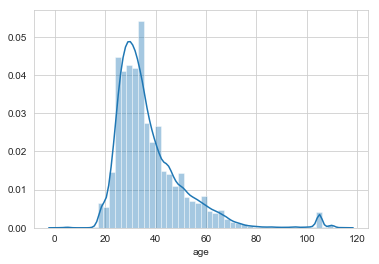

In [102]:
sns.distplot(df_users['age'].dropna())

Are some age groups more likely to book in a particular destination? To answer this question, we will use the box plot and look at the distribution of ages for travellers to a particular country.

(10, 75)

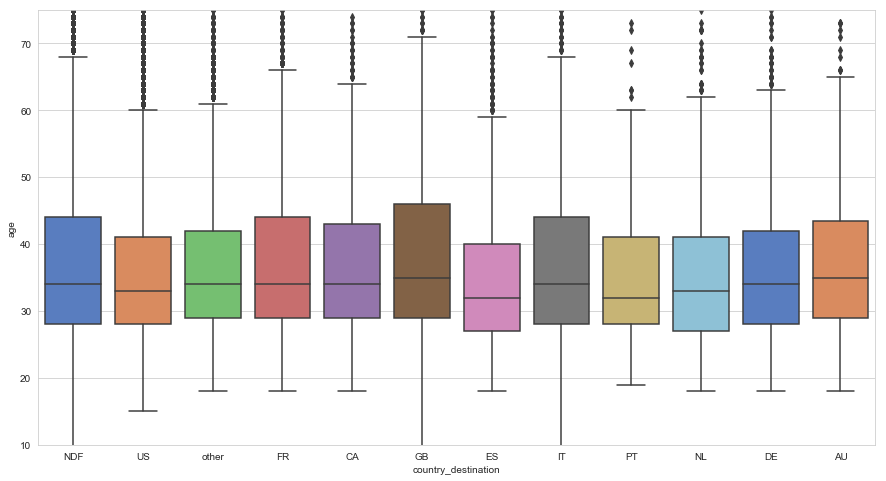

In [105]:
fig, ax = plt.subplots(nrows=1, ncols=1,figsize=(15, 8))
sns.boxplot(x='country_destination', y='age', data=df_users, palette="muted", ax =ax)
ax.set_ylim([10, 75])

From the boxplot constructed, we find that the distribution is more or less the same for every country. **Great Britain** has the highest median age of travellers and **Spain** is more popular amongst younger travellers.